# Kenya Primary School Exploratory Data Analysis

Dataset dowloaded from **africaopendata.org**. It´s a record of Primary Schools in Kenya (2013). 

The first thing we should do is getting some domain knowledge looking for some information.


According to **World Education News+ Reviews** (https://wenr.wes.org/), Kenya’s national education system is structured on an 8-4-4 model with eight years of basic education, four years of secondary education and a four-year undergraduate curriculum. Primary education was made free to all students in 2003, a policy that increased attendance by almost 40 percent within four years, from 5.9 million in 2003 to 8.2 million in 2007.

The cycle is divided into lower (Standards 1-3), middle (Standards 4 & 5) and upper primary (Standards 6-8). At the end of the primary cycle, students take the national Kenya Certificate of Primary Education examination (KCPE).The examination is used primarily to rank and stream students into secondary and technical schools. Students who perform well gain admission into national secondary schools, while those with average scores attend provincial schools.

The curriculum is uniform across the country and includes: English, Kiswahili, a local language, mathematics, science, social studies, religious education, creative arts, physical education, and life skills. Exams are held in five subjects: Kiswahili, English, mathematics, science and agriculture, and social studies.


Now we've learned something about the Primary School in Kenya, let´s start with the dataset!

In [64]:
#Libraries:
import pandas as pd  # Linear Algebra
import numpy as np  # Data Processing
import matplotlib.pyplot as plt  # Graphs
import seaborn as sns # Graphs
import datetime  # Date and time manipulate
%matplotlib inline

We load the dataset:

In [3]:
KSchool_data = pd.read_csv('./kenya_primary_schools.csv')

Now we look at the first rows of the dataset:

In [4]:
KSchool_data.head()

,X,Y,FID,Name_of_Sc,Level_,Status,SchSponsor,Type1,Type2,Type3,...,OthersF,NoTeaching,NonTeachin,Province,District,Division,Location,Costituenc,Latitude,Longitude
0,36.14,0.27,10001,CHEBIREBEI PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,...,0.0,0.0,0.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,SINENDE,0.27,36.14
1,36.17,0.26,10002,WASEGES PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,1.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,SINENDE,0.26,36.17
2,36.18,0.24,10003,KIRIBOT PRI,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,1.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,KABUSWO,0.24,36.18
3,36.19,0.21,10004,KABUSWO PRI SCH,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,2.0,0.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,KABUSWO,0.21,36.19
4,37.70,-0.88,10005,VONDENI PRI SCHOOL,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,1.0,EASTERN,MACHAKOS,MASINGA,KIVAA,MASINGA,-0.88,37.70


In [5]:
KSchool_data.shape

(31230, 38)

The dataset contains **31.230 rows** and **38 features**. Let´s take a quick look at those features:

In [6]:
KSchool_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31230 entries, 0 to 31229
Data columns (total 38 columns):
X              31230 non-null float64
Y              31230 non-null float64
FID            31230 non-null int64
Name_of_Sc     31229 non-null object
Level_         31229 non-null object
Status         31229 non-null object
SchSponsor     31229 non-null object
Type1          31229 non-null object
Type2          31229 non-null object
Type3          31229 non-null object
PupilTeach     31229 non-null float64
ClassrmRat     31229 non-null float64
ToiletRati     31229 non-null float64
No_Classrm     31229 non-null float64
BoysToilet     31229 non-null float64
GirlsToilet    31229 non-null float64
TeachersTo     31229 non-null float64
TotalToile     31229 non-null float64
TotalBoys      31229 non-null float64
TotalGirls     31229 non-null float64
TotalEnrol     31229 non-null float64
GO_KTSC_M      31229 non-null float64
GOK_TSC_F      31229 non-null float64
authorityM     31229 non-n

We find **12 object features** (text) and **26 numeric features** (float64). 

Let´s take a look to the amount of null data in the dataset:

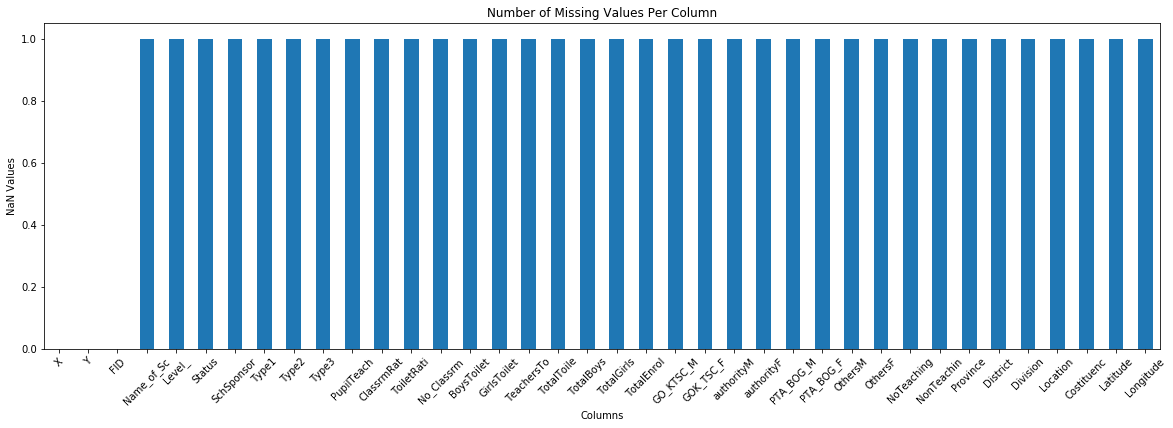

In [33]:
# plot missing data:
KSchool_data.isnull().sum().plot(kind='bar', figsize=(20,6))
# Add a title and show the plot.
plt.title('Number of Missing Values Per Column')
# Create tick mark labels on the Y axis and rotate them.
plt.xticks(rotation = 45)
# Create X axis label.
plt.xlabel("Columns")
# Create Y axis label.
plt.ylabel("NaN Values");

There´s **only one missing value in each column**, except in features *X*, *Y* and *FID*. We need to check if the only missing value is located in the same row for all the features. In that case, we could drop the row.

In [39]:
# index for missing data
nan_row = KSchool_data[KSchool_data['Name_of_Sc'].isnull()]
nan_row

,X,Y,FID,Name_of_Sc,Level_,Status,SchSponsor,Type1,Type2,Type3,...,OthersF,NoTeaching,NonTeachin,Province,District,Division,Location,Costituenc,Latitude,Longitude
24229,37.840855,-0.492438,31230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We've confirmed all the NaNs are in the same row.

Let´s examine first the *object features*:

## Categorical data Analysis

Categorical features are: *'Level_'*, *'Status'*, *'SchSponsor'*, *'Type1'*, *'Type2'*, *'Type3'*, *'Province'*, *'District'*, *'Division'*, *'Constituenc'*, *'Latitude'* and *'Longitude'*. To make tha analysis easier, we are filtering them in a new dataframe:

In [51]:
cat_data = KSchool_data.select_dtypes(include=['object']).copy()

In [59]:
#for x in range (0, len(cat_data)):
#    cat_data[cat_features[x]].value_counts()

In [60]:
cat_data['Level_'].value_counts()

PRIMARY SCHOOL    31229
Name: Level_, dtype: int64

*Level_* feature only contains *PRIMARY SCHOOL*, we can drop it from the dataframe because we already knew the data came from Primary Schools.

In [61]:
cat_data['Status'].value_counts()

PUBLIC     23792
PRIVATE     7437
Name: Status, dtype: int64

*Status* contains either *PUBLIC* or *PRIVATE*, meaning Public or Private School.

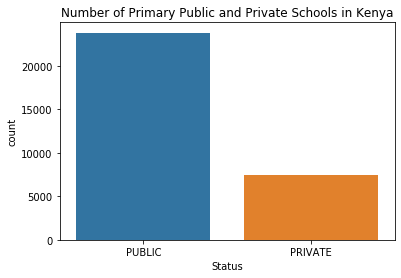

In [106]:
# Arrange figure size 
plt.figure(figsize=(6, 4))
# Add a title and show the plot.
plt.title('Number of Primary Public and Private Schools in Kenya')
sns.countplot(data = cat_data, x = 'Status')
#plt.grid(True)
#plt.show()

We can see most of schools ar public in the upper graph.

In [112]:
cat_data['SchSponsor'].value_counts()

RELIGIOUS ORGANIZATION                   13672
CENTRAL GOVERNMENT/DEB                    9816
PRIVATE INDIVIDUAL                        3432
PRIVATE INDIVIDUAL/ORGANIZATION           1264
LOCAL GOVERNMENT AUTHORITY                 755
PRIVATE INDIVIDUAL/ORGANISATION            753
COMMUNITY                                  751
NGO/CBO                                    273
RELIGIOUS ORGANISATION                     226
                                           207
CENTRAL GOVERNMENT                          29
CENTRAL GOVERNMET/DEB                       20
CENTRAL GORVERNMENT/DEB                     11
LOCAL GORVERNMENT AUTHORITY                  4
LOCAL AUTHORITY                              4
PUBLIC                                       2
-                                            2
NON -PROFIT MISSION UNDER SOCIETY ACT        1
KIPKEINO CHILDREN HOME                       1
CI                                           1
DEB                                          1
CENTRAL  GOVE

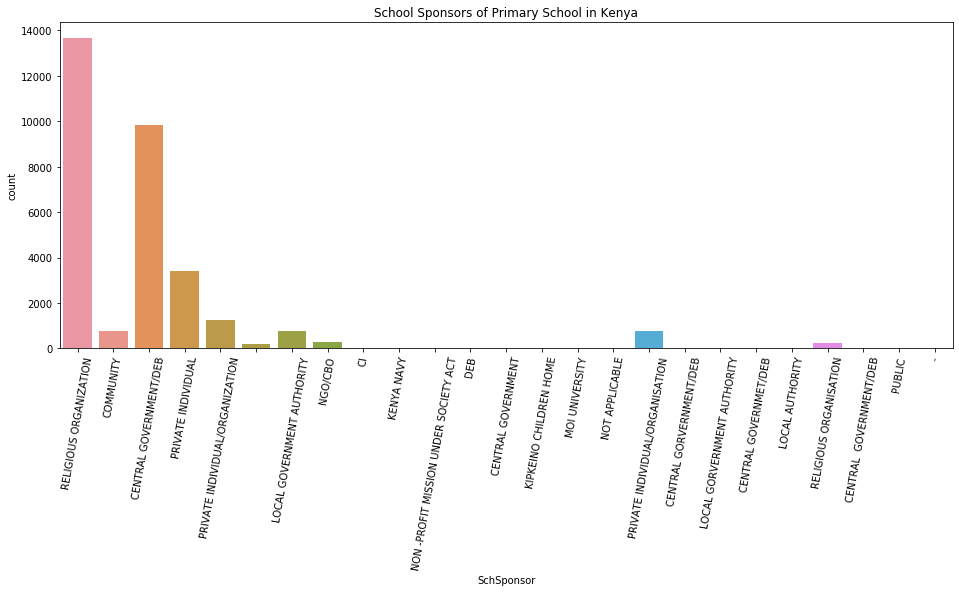

In [110]:
# Arrange size figure
plt.figure(figsize=(16, 6))
# Add a title and show the plot.
plt.title('School Sponsors of Primary School in Kenya')
# Create tick mark labels on the Y axis and rotate them.
plt.xticks(rotation = 80)
sns.countplot(data = cat_data, x = 'SchSponsor')

There are some things to notice (and solve)in *'SchSponsor'* feature:
- **RELIGIOUS ORGANIZATION** category is the same as RELIGIOUS ORGANISATION (the second one is not written properly). We will solve it.   
- In **CENTRAL GOVERNMENT/DEB** occurs again, it´s written later as CENTRAL GOVERNMET/DEB, CENTRAL GORVERNMENT/DEB and CENTRAL  GOVERNMENT/DEB.

In [113]:
cat_data['Type1'].value_counts()

MIXED         30570
                352
GIRLS ONLY      211
BOYS ONLY        96
Name: Type1, dtype: int64

'Type1' is related to gender of students: MIXED, GIRLS ONLY, BOYS ONLY and 352 instances unknown.

Text(0, 0.5, 'Number of Students')

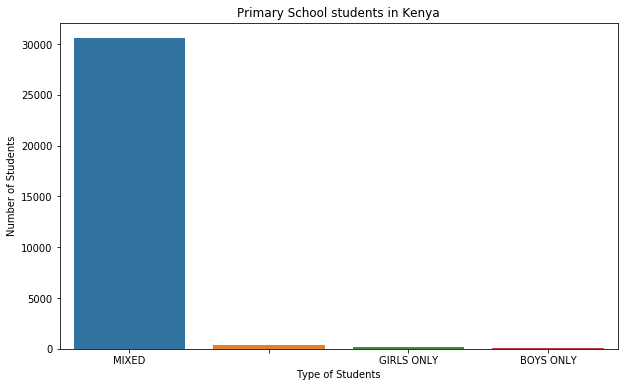

In [83]:
# Arrange size figure
plt.figure(figsize=(10, 6))
# Add a title and show the plot.
plt.title('Primary School students in Kenya')
# Create tick mark labels
plt.xticks
sns.countplot(data = cat_data, x = 'Type1')
# Create X axis label.
plt.xlabel("Type of Students")
# Create Y axis label
plt.ylabel("Number of Students")

In [114]:
cat_data['Type2'].value_counts()

DAY ONLY                 28572
DAY & BOARDING            1660
BOARDING ONLY              544
                           405
DAY AND BOARDING            40
DAY AND BOARDING ONLY        3
DAY& BOARDING                1
DE                           1
N                            1
I                            1
DAY 7& BOARDING              1
Name: Type2, dtype: int64

The *'Type2'* feature shows the type of stay in the centre: day only, day and boarding, boarding only.

Text(0, 0.5, 'Number of Students')

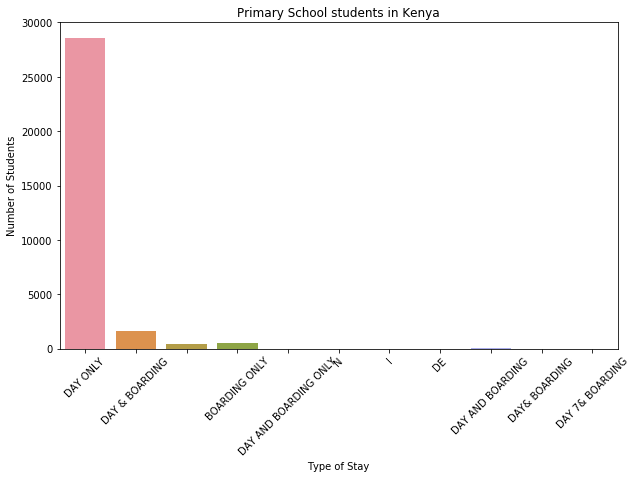

In [89]:
# Arrange size figure
plt.figure(figsize=(10, 6))
# Add a title and show the plot.
plt.title('Primary School students in Kenya')
# Create tick mark labels
plt.xticks(rotation = 45)
sns.countplot(data = cat_data, x = 'Type2')
# Create X axis label.
plt.xlabel("Type of Stay")
# Create Y axis label
plt.ylabel("Number of Students")

In [115]:
cat_data['Type3'].value_counts()

ORDINARY          28976
INTEGRATED         1614
SPECIAL SCHOOL      639
Name: Type3, dtype: int64

Text(0, 0.5, 'Number of Students')

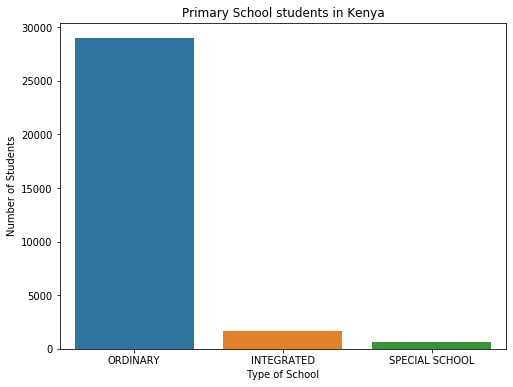

In [92]:
# Arrange size figure
plt.figure(figsize=(8, 6))
# Add a title and show the plot.
plt.title('Primary School students in Kenya')
# Create tick mark labels
plt.xticks
sns.countplot(data = cat_data, x = 'Type3')
# Create X axis label.
plt.xlabel("Type of School")
# Create Y axis label
plt.ylabel("Number of Students")

In [116]:
cat_data['Province'].value_counts()

EASTERN          10064
RIFT VALLEY       7176
NYANZA            4821
CENTRAL           3186
WESTERN           2639
COAST             1697
NAIROBI           1241
NORTH EASTERN      404
Central              1
Name: Province, dtype: int64

Text(0, 0.5, 'Number of Students')

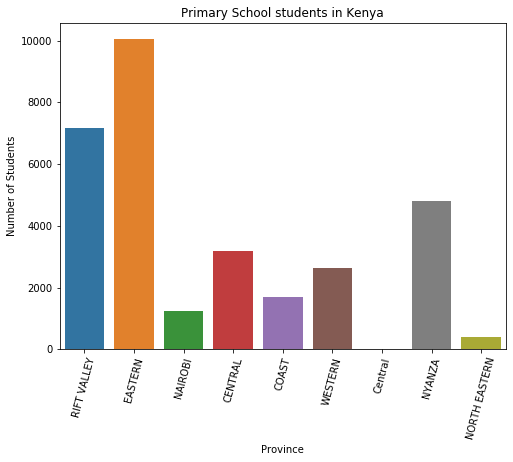

In [95]:
# Arrange size figure
plt.figure(figsize=(8, 6))
# Add a title and show the plot.
plt.title('Primary School students in Kenya')
# Create tick mark labels
plt.xticks(rotation = 75)
sns.countplot(data = cat_data, x = 'Province')
# Create X axis label.
plt.xlabel("Province")
# Create Y axis label
plt.ylabel("Number of Students")

In [117]:
cat_data['District'].value_counts()

MACHAKOS        1884
MAKUENI         1802
KITUI           1356
NAIROBI         1241
MERU CENTRAL     974
                ... 
WAJIR            124
MANDERA          117
MOYALE           106
LAMU              70
IJARA             37
Name: District, Length: 71, dtype: int64

Text(0, 0.5, 'Number of Students')

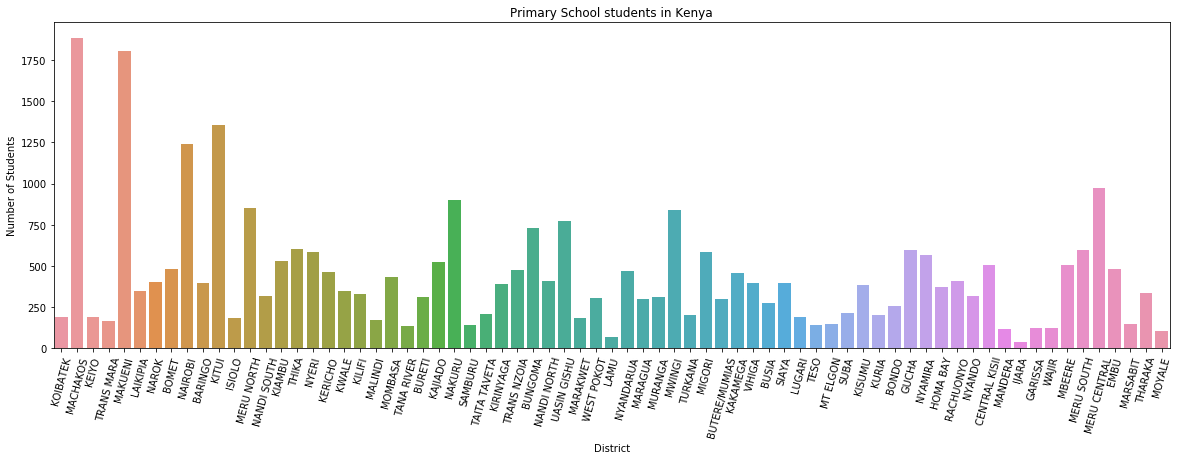

In [98]:
# Arrange size figure
plt.figure(figsize=(20, 6))
# Add a title and show the plot.
plt.title('Primary School students in Kenya')
# Create tick mark labels
plt.xticks(rotation = 75)
sns.countplot(data = cat_data, x = 'District')
# Create X axis label.
plt.xlabel("District")
# Create Y axis label
plt.ylabel("Number of Students")

Looking for **duplicated rows**:

In [15]:
if len(KSchool_data[KSchool_data.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(KSchool_data[KSchool_data.duplicated()]))
    print(KSchool_data[KSchool_data.duplicated(keep = False)].sort_values(by=list(KSchool_data.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


## Numerical Data Analysis

First of all, we should check if data is intuitive.

There are **26 numerical features**:

In [123]:
numeric_data = KSchool_data.select_dtypes(exclude=['object']) #filter numeric features in a new dataset

In [120]:
numeric_data.columns

Index(['X', 'Y', 'FID', 'PupilTeach', 'ClassrmRat', 'ToiletRati', 'No_Classrm',
       'BoysToilet', 'GirlsToilet', 'TeachersTo', 'TotalToile', 'TotalBoys',
       'TotalGirls', 'TotalEnrol', 'GO_KTSC_M', 'GOK_TSC_F', 'authorityM',
       'authorityF', 'PTA_BOG_M', 'PTA_BOG_F', 'OthersM', 'OthersF',
       'NoTeaching', 'NonTeachin', 'Latitude', 'Longitude'],
      dtype='object')

¿What does all these **features** mean?

- *'X'*: X Coordinate of the school
- *'Y'*: Y Coordinate of the school
- *'FID'*: Identifier
- *'PupilsTeach'*: Pupils teacher ratio
- *'ClassrmRat'*: Classroom ratio
- *'ToiletRati'*: Toilets ratio
- *'No_Classrm'*: number of classrooms
- *'BoysToilet'*: number of toilets for boys at school
- *'GirlsToilet'*: number of toilets for girls at school
- *'TeachersTo'*: number of toilets for teachers at school
- *'TotalToile'*: total number of toilets at school
- *'TotalBoys'*: total number of boys
- *'TotalGirls'*: total number of girls
- *'TotalEnrol'*: total number of kids
- *'GO_KTSC_M'*: Government Of Kenya Teacher Service Commission Male
- *'GOK_TSC_F'*: Government Of Kenya Teacher Service Commission Female
- *'authorityM'*: Authority male
- *'authorityF'*: Authority female
- *'PTA_BOG_M'*:
- *'PTA_BOG_F'*:
- *'OthersM'*: others male
- *'OthersF'*: others female
- *'NoTeaching'*: non teaching staff
- *'NonTeachin'*: non teaching staff
- *'Latitude'*: latitude of the school in degrees
- *'Longitude'*:longitude of the school in degrees

*'X'*, *'Y'*, *'Latitude'* and *'Longitude'* are coordinates related to each school. *'X'* and *'Y'* are UTM coordinates, *'Latitude'* and *'Longitude'* are geographic coordinates, in degrees (same information in two different systems of measure).

*'FID'* is the unique identifier for each school.

In [122]:
numeric_data.head(10)

,X,Y,FID,PupilTeach,ClassrmRat,ToiletRati,No_Classrm,BoysToilet,GirlsToilet,TeachersTo,...,authorityM,authorityF,PTA_BOG_M,PTA_BOG_F,OthersM,OthersF,NoTeaching,NonTeachin,Latitude,Longitude
0,36.14,0.27,10001,15.7,5.9,23.5,8.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27,36.14
1,36.17,0.26,10002,24.5,18.4,36.8,8.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.26,36.17
2,36.18,0.24,10003,23.6,14.8,59.0,8.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.24,36.18
3,36.19,0.21,10004,33.3,29.6,53.2,9.0,2.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.21,36.19
4,37.70,-0.88,10005,31.8,23.1,42.3,11.0,4.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-0.88,37.70
5,36.10,0.07,10006,31.3,40.7,27.1,10.0,8.0,7.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.07,36.10
6,36.13,0.10,10007,39.0,30.3,34.1,9.0,4.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.10,36.13
7,36.14,0.13,10008,26.0,26.0,13.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.13,36.14
8,35.54,0.37,10009,27.2,44.1,23.5,8.0,7.0,8.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.37,35.54
9,36.09,0.11,10010,16.4,14.4,23.0,8.0,3.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.11,36.09


We can see some features with **lots of zero values** (*autorityM*, *autorityF*, ...). And the previus research suggest sthat some of them can be obtained from other ones. So let´s explore them a bit more calculating basic statistics:

In [26]:
numeric_data.describe().transpose

<bound method DataFrame.transpose of                   X             Y          FID    PupilTeach    ClassrmRat  \
count  31230.000000  31230.000000  31230.00000  31229.000000  31229.000000   
mean      36.525398     -0.608358  15615.50000     31.162045     30.516667   
std        1.549535      1.200350   9015.46879     24.833860     21.666361   
min       33.930000     -4.660000      1.00000      0.000000      0.000000   
25%       35.010000     -1.230000   7808.25000     16.300000     17.300000   
50%       36.810000     -0.560000  15615.50000     30.400000     29.600000   
75%       37.660000      0.090000  23422.75000     42.100000     40.800000   
max       41.890000      5.290000  31230.00000    839.000000    839.000000   

         ToiletRati    No_Classrm    BoysToilet   GirlsToilet    TeachersTo  \
count  31229.000000  31229.000000  31229.000000  31229.000000  31229.000000   
mean      34.776230      8.973710      4.563739      5.101444      1.907298   
std       33.623305    

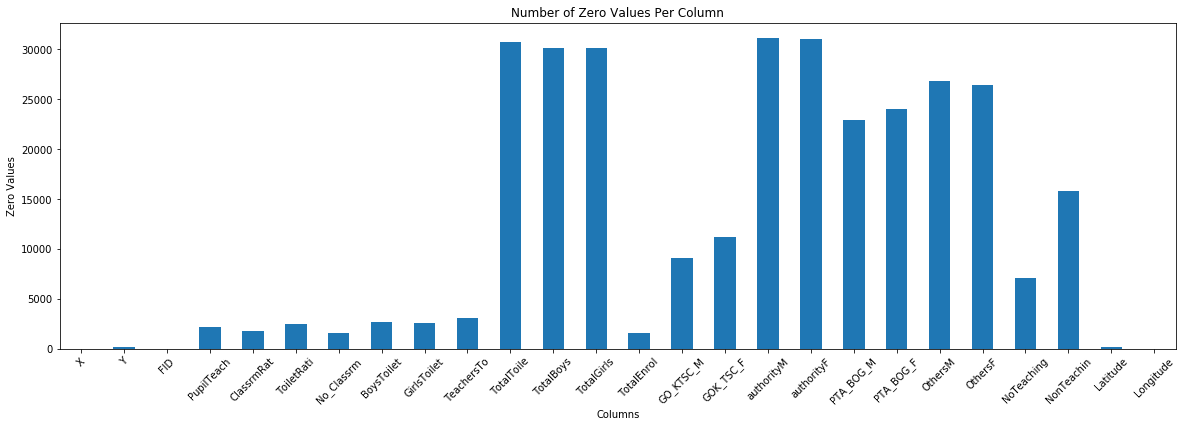

In [45]:
is_zero = numeric_data == 0.0
# plot number of zero data.
is_zero.sum().plot(kind='bar', figsize=(20,6))
# Add a title and show the plot.
plt.title('Number of Zero Values Per Column')
# Create tick mark labels on the Y axis and rotate them.
plt.xticks(rotation = 45)
# Create X axis label.
plt.xlabel("Columns")
# Create Y axis label.
plt.ylabel("Zero Values");

In [156]:
is_zero.sum()

X                  0
Y                131
FID                0
PupilTeach      2162
ClassrmRat      1806
ToiletRati      2523
No_Classrm      1590
BoysToilet      2648
GirlsToilet     2564
TeachersTo      3127
TotalToile     30740
TotalBoys      30122
TotalGirls     30120
TotalEnrol      1537
GO_KTSC_M       9053
GOK_TSC_F      11223
authorityM     31104
authorityF     30977
PTA_BOG_M      22907
PTA_BOG_F      23971
OthersM        26822
OthersF        26398
NoTeaching      7052
NonTeachin     15795
Latitude         131
Longitude          0
dtype: int64

*'TotalToile'*, *'TotalBoys'*, *'TotalGirls'*, *'authorityM'* and *'autorityF'* are features with many zero values (there are 31.230 rows in the dataset, so the percentage of zeros is really high). Let´s investigate a bit more.

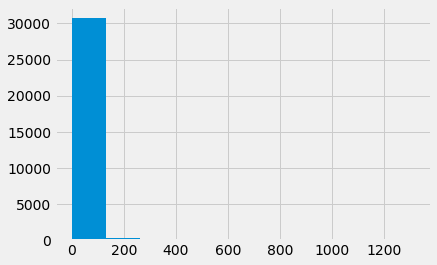

In [147]:
numeric_data['TotalGirls'].hist()

In [148]:
numeric_data['TotalGirls'].describe()

count    31229.000000
mean         6.403087
std         51.213811
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1312.000000
Name: TotalGirls, dtype: float64

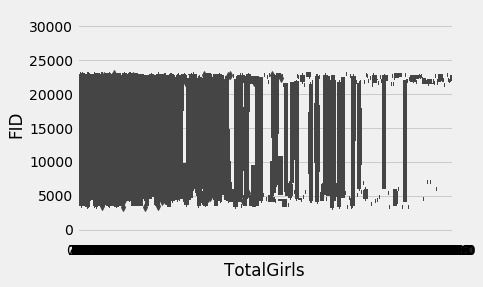

In [150]:
sns.boxplot(x = 'TotalGirls', y = 'FID', data = numeric_data)